<style>

h1 {
    color: #fff;
    text-align: center;
    font-size: 80px;
    margin-bottom: 40px;
    margin-top: 60px;
}


p {
    color:#fff;
    font-size: 24px;
    text-align: center;
    margin-bottom: 10px;
}

.details {
    border: 2px solid #fff;
    padding: 20px;
    border-radius: 60px;
    margin: auto;
    max-width: 600px;
    margin-bottom: 30px;
}
</style>

<h1>Customer Churn</h1>

<div class="details">
    <p><strong>Integrantes:</strong> Brayan Garzón, Kevin, Julian</p>
    <p><strong>Curso:</strong> Machine Learning UIFCE</p>
    <p><strong>Fecha:</strong> Julio de 2023</p>
</div>

# Análisis de Customer Churn

El objetivo de este trabajo es realizar un análisis y exploración inicial de datos para un problema de **Customer Churn**, que se refiere a la tasa de pérdida de clientes en un negocio. Nuestro objetivo es comprender las características de los datos, identificar patrones y realizar hipótesis analíticas para cada tipo de variable en el conjunto de datos, siguiendo lo aprendido en el curso.

## Pregunta a responder:

a) **Variable objetivo:** La variable objetivo de nuestro conjunto de datos es la que queremos predecir, en este caso, sería la variable que representa el Customer Churn, es decir, si un cliente deja de utilizar los servicios o productos de la empresa.

b) **Problema de Clasificación:** Consideramos que este es un problema de clasificación, ya que queremos predecir si un cliente se va (1) o no se va (0) basado en un conjunto de características.

c) **Exploración inicial de datos:** Realizaremos una exploración inicial para comprender la estructura del dataset:

- Dimensiones del dataset.
- Tipo de datos de cada variable.
- Cantidad de valores nulos.

Consideramos que este dataset podría ser adecuado para hacer Machine Learning, siempre y cuando se realice un adecuado preprocesamiento de datos para manejar los valores nulos y codificar las variables categóricas.

d) **Análisis de frecuencia de variables categóricas:** Examinaremos la frecuencia de las variables categóricas, identificaremos el balance de clases en la variable objetivo y buscaremos patrones entre las variables categóricas.

e) **Análisis de distribución de variables numéricas:** Analizaremos si las variables numéricas siguen una distribución normal y buscaremos asimetrías. Formularemos hipótesis sobre la distribución de las variables numéricas, apoyándonos en gráficos y medidas univariadas.

f) **Análisis de distribución intercuartílica para problemas de clasificación:** Ya que el problema es de clasificación analizaremos la distribución intercuartílica de las variables numéricas dividiendo por categorías de las variables categóricas relevantes, comenzando por la variable objetivo. Identificaremos aspectos relevantes de este análisis.

g) **Análisis de correlación entre variables numéricas:** Buscaremos correlaciones problemáticas entre las variables numéricas de nuestro conjunto de datos.




In [1]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys

sys.path.append("..")
from utility import plot_settings


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
df = pd.read_csv('../data/Customer_Churn.csv', sep=';')

In [3]:
df.head()

,CustomerID,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [5]:
df.describe()

,CustomerID,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
# Variable objetivo
df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

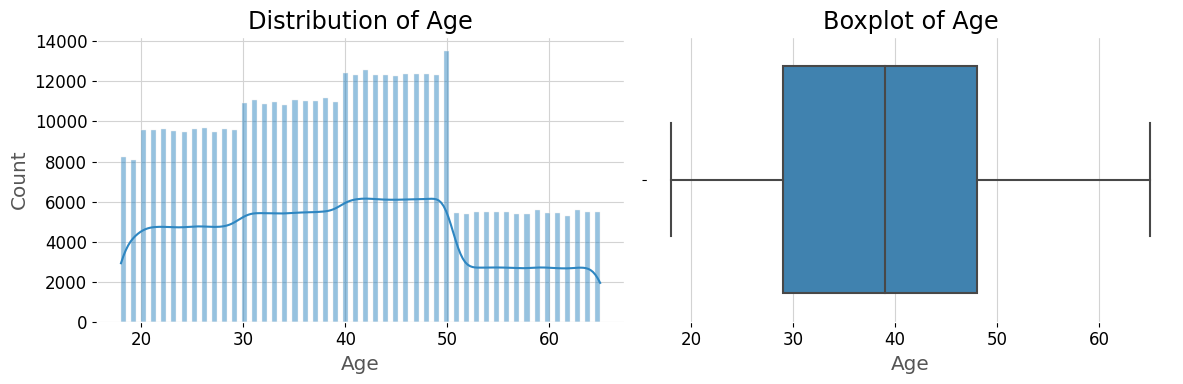

In [7]:
# Variables numéricas
# Plotting solo variables numéricas
def plot_num(df, col):
    fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
    
    sns.histplot(data=df, x=col, kde=True, color='#2E86C1', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    
    sns.boxplot(data=df, x=col, color='#2E86C1', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


plot_num(df, 'Age')


In [8]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

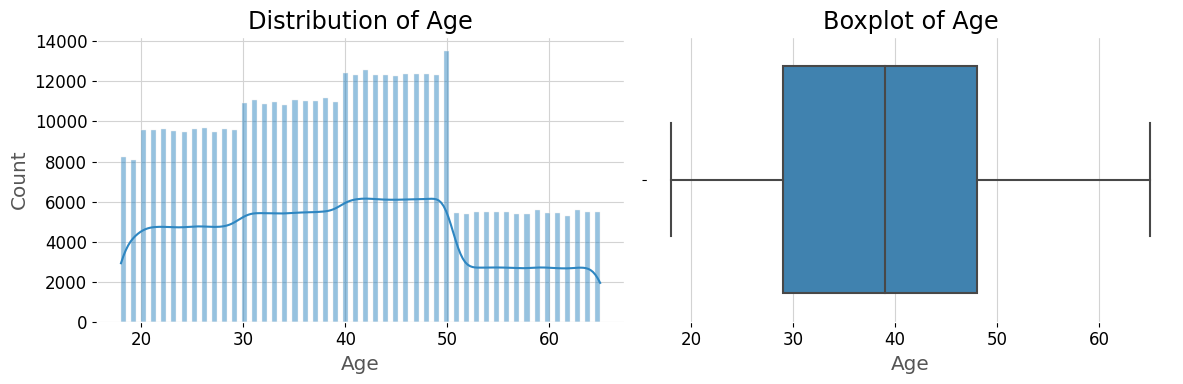

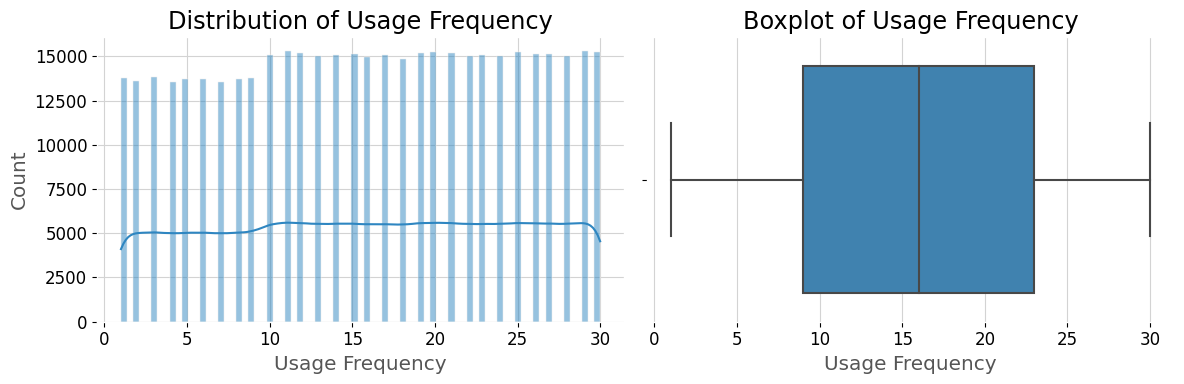

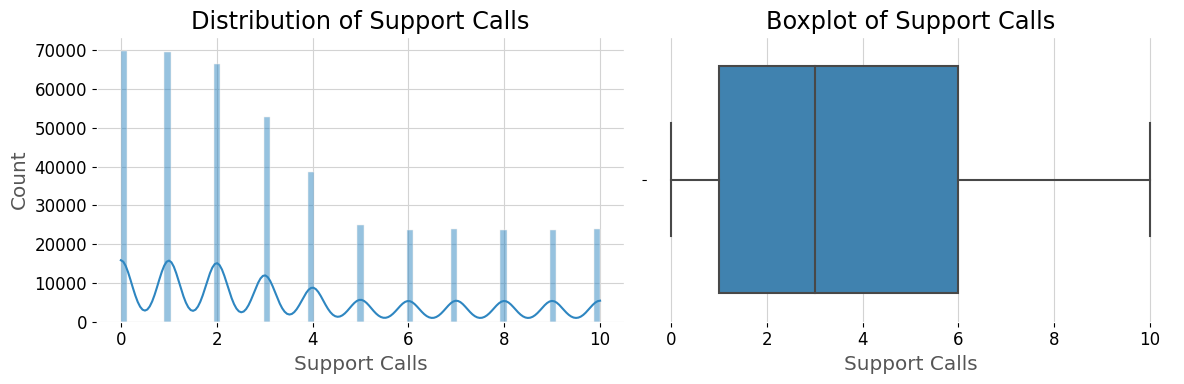

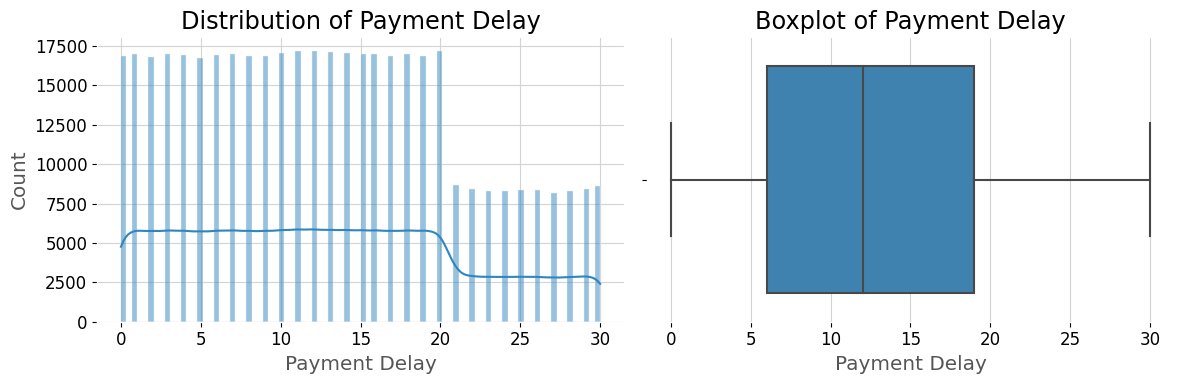

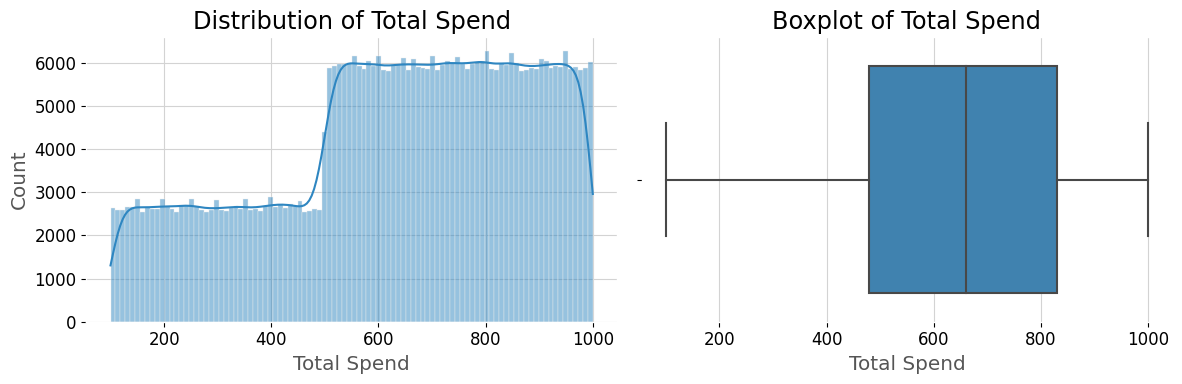

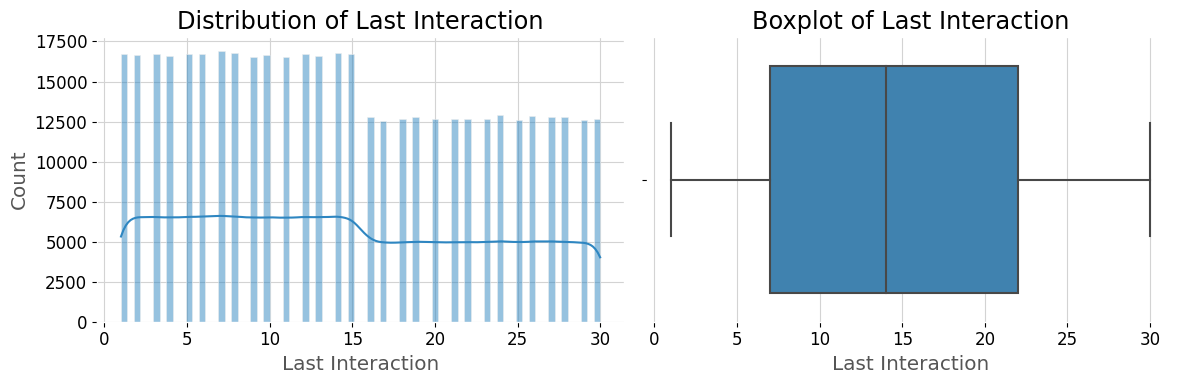

In [9]:
numeric_cols = ['Age','Usage Frequency','Support Calls','Payment Delay','Total Spend', 'Last Interaction']

for col in numeric_cols:
       plot_num(df, col)

In [10]:
def plot_cat(df, col):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, colors=sns.color_palette('viridis'), autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

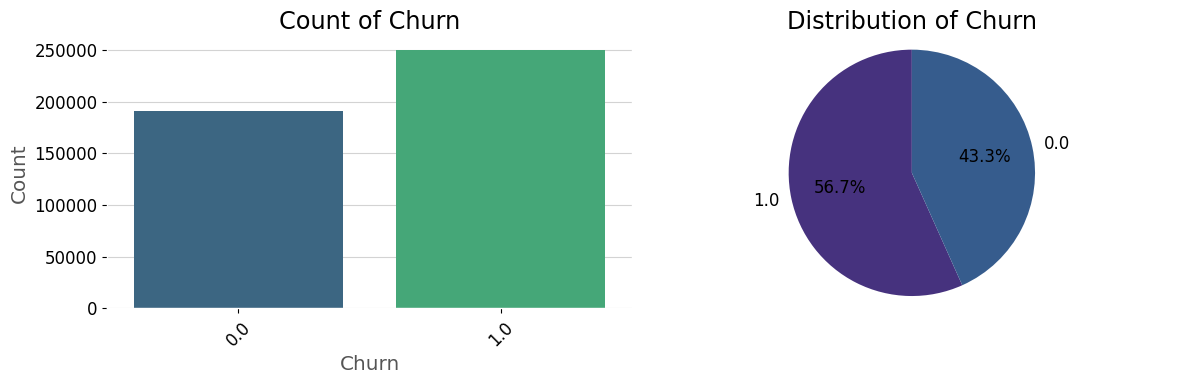

In [11]:
plot_cat(df, 'Churn')

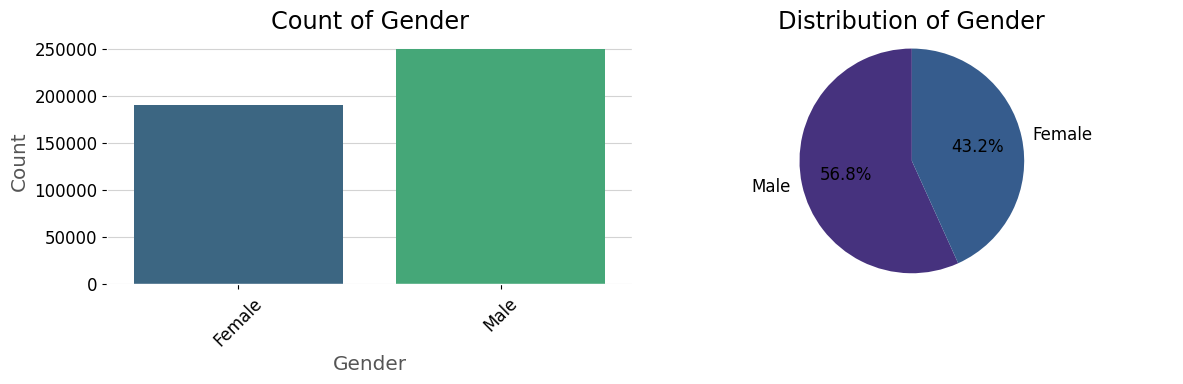

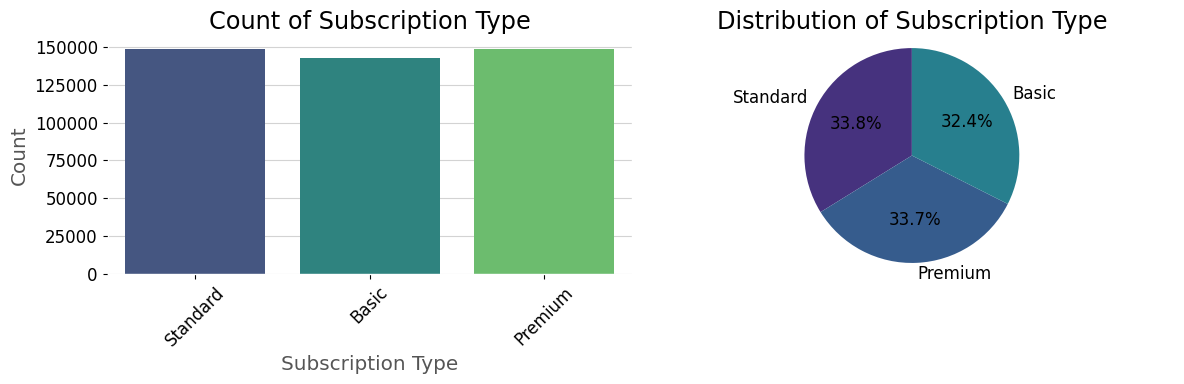

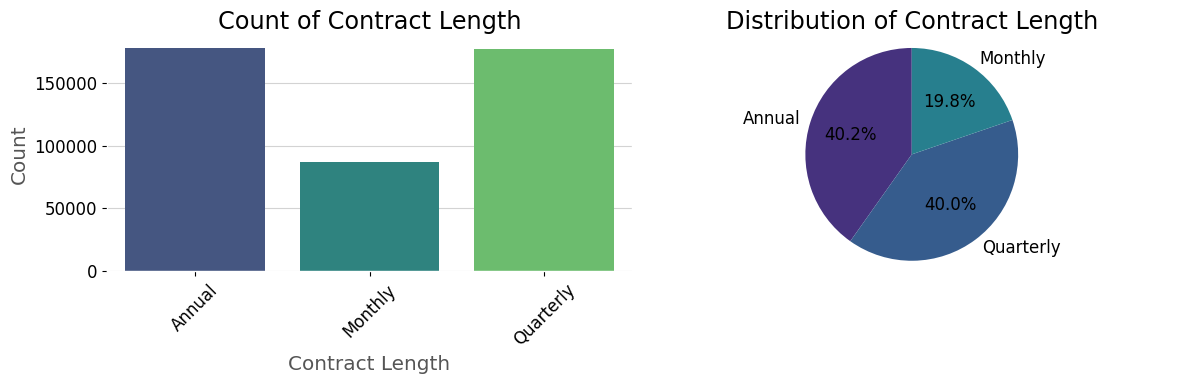

In [12]:
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in cat_cols:
    plot_cat(df, col)

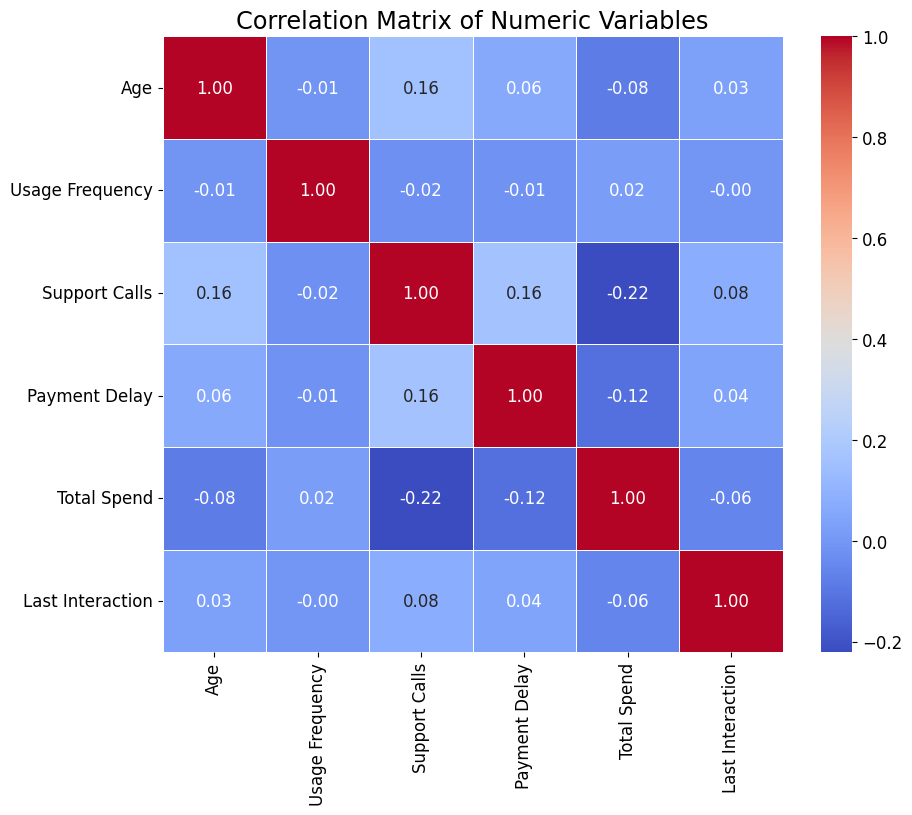

In [13]:
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.show()
    
correlation_heatmap(df[numeric_cols])
